### 1) `from matplotlib.ticker import FormatStrFormatter`
**Что это:** Класс форматтера для подписей делений осей (`Ticker Formatter`) в Matplotlib, форматирует числа по C-подобной строке формата.

**Главный параметр**
- `fmt` — строка формата, например:
  - `%.1f` — одна цифра после запятой
  - `%.0f` — без десятичных
  - `%d` — целые

**Где применяется:** передаётся в `Axis.set_major_formatter(...)` или `Axis.set_minor_formatter(...)` для форматирования подписей делений.

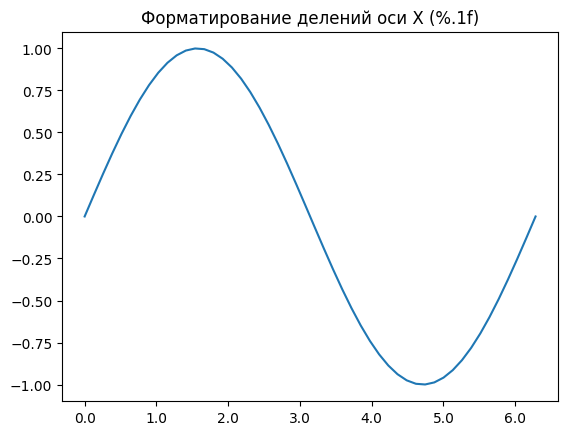

In [1]:
# 1) Пример: используем FormatStrFormatter для форматирования оси X
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))  # показываем 1 знак после запятой
ax.set_title("Форматирование делений оси X (%.1f)")
plt.show()

### 2) `axes_big.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))`
**Что делает:** Устанавливает **форматтер для основных делений** оси X у объекта `axes_big`.

**Параметр**
- `FormatStrFormatter('%.1f')` — форматтер, который выводит значения с одной цифрой после запятой.

**Эффект:** все подписи основных (major) делений на оси X будут вида `0.0, 0.5, 1.0, ...`.

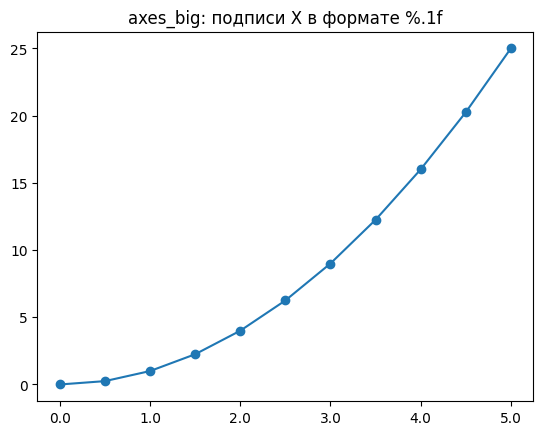

In [2]:
# 2) Пример: создаём axes_big и форматируем ось X
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, axes_big = plt.subplots()
x = np.linspace(0, 5, 11)
axes_big.plot(x, x**2, marker='o')
axes_big.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes_big.set_title("axes_big: подписи X в формате %.1f")
plt.show()

### 3) Параметр `fontweight="bold"`
**Где используется:** В большинстве функций, рисующих текст: `plt.title`, `Axes.set_title`, `plt.xlabel`, `plt.ylabel`, `Axes.text`, `Figure.text`, `annotate` и т.п.

**Что делает:** Делает шрифт жирным (усиливает насыщенность).

**Значения:**
- строковые: `"normal"`, `"bold"`, `"heavy"`, `"light"`, `"ultrabold"`, `"semibold"`, и т.п.
- числовые: `100, 200, …, 900` (аналогично CSS).

**Пример вызова:** `ax.set_title("Заголовок", fontweight="bold")`

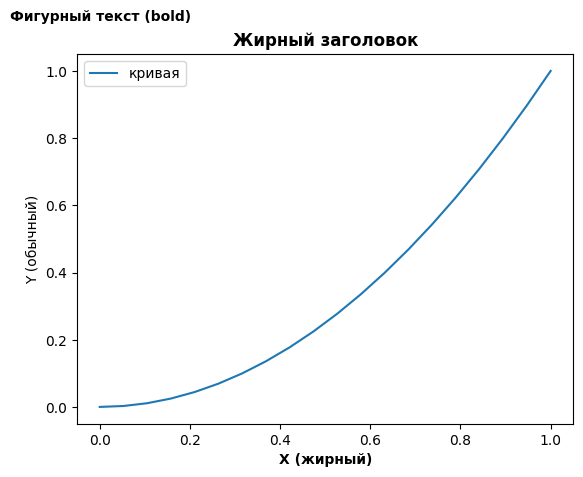

In [3]:
# 3) Пример: разные места применения fontweight="bold"
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 20)
y = x**2

fig, ax = plt.subplots()
ax.plot(x, y, label="кривая")
ax.set_title("Жирный заголовок", fontweight="bold")
ax.set_xlabel("X (жирный)", fontweight="bold")
ax.set_ylabel("Y (обычный)")
fig.text(0.02, 0.95, "Фигурный текст (bold)", fontweight="bold")
ax.legend()
plt.show()

### 4) `ConnectionPatch(...)`
**Что делает:** Соединяет две точки из двух разных систем координат (например, из основного графика и вставки/inset) линией/стрелкой.

**Ключевые параметры:**
- `xyA` — координаты точки A.
- `coordsA` — система координат точки A (`ax.transData`, `ax.transAxes`, `fig.transFigure`, и т.п.).
- `xyB` — координаты точки B.
- `coordsB` — система координат точки B.
- `linewidth` — толщина линии.
- `color` — цвет линии.

**Примечание:** Для отображения патча нужно добавить его в фигуру/оси (`fig.add_artist(...)` или `ax.add_artist(...)`).

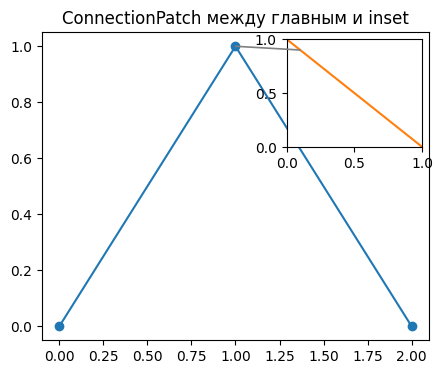

In [4]:
# 4) Пример: соединяем точку на основном графике с точкой во вставке
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax_main = plt.subplots(figsize=(5, 4))
ax_main.plot([0, 1, 2], [0, 1, 0], marker='o')
ax_main.set_title("ConnectionPatch между главным и inset")

# Вставка
ax_inset = inset_axes(ax_main, width="35%", height="35%", loc="upper right")
ax_inset.plot([0, 1], [1, 0], color="tab:orange")
ax_inset.set_xlim(0, 1)
ax_inset.set_ylim(0, 1)

# Координаты: точка на главной оси (в data), точка во вставке (в долях оси inset)
region_corners = {"A": (1, 1)}
inset_corners = {"B": (0.1, 0.9)}

con = ConnectionPatch(
    xyA=region_corners["A"], coordsA=ax_main.transData,
    xyB=inset_corners["B"], coordsB=ax_inset.transAxes,
    linewidth=1.2, color="gray"
)
fig.add_artist(con)

plt.show()

### 5) `ax.scatter([xi], [yi], s=25, zorder=5, c="k", marker="x")`
**Что делает:** Рисует **одну** точку рассеяния `scatter` в координатах `(xi, yi)`.

**Параметры:**
- `s` — размер маркера (площадь).
- `zorder` — порядок отрисовки (выше — поверх других элементов).
- `c` — цвет (здесь чёрный `"k"`).
- `marker` — форма маркера (`"x"`, `"o"`, `"*"`, и др.).

**Зачем списки:** `scatter` ждёт массивы; для одной точки передаём списки длины 1.

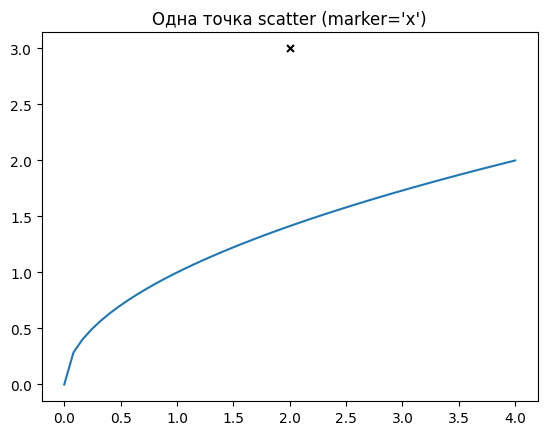

In [5]:
# 5) Пример: отметим точку крестиком
import matplotlib.pyplot as plt
import numpy as np

xi, yi = 2, 3
x = np.linspace(0, 4, 50)
y = x**0.5

fig, ax = plt.subplots()
ax.plot(x, y)
ax.scatter([xi], [yi], s=25, zorder=5, c="k", marker="x")
ax.set_title("Одна точка scatter (marker='x')")
plt.show()

### 6) `fig.text(0.02, 0.02, "\\n".join(conclusions) + "\\n" + "Пересечения: " + pairs_text, fontsize=9)`
**Что делает:** Пишет произвольный текст **в координатах фигуры** (0..1 по ширине и высоте).

**Параметры ключевые:**
- `x, y` — положение в долях фигуры (левый нижний угол — `(0, 0)`).
- `s` — строка текста; `"\n".join(conclusions)` склеивает список строк переносами.
- `fontsize` — размер шрифта.

**Примечание:** Хорошо подходит для сносок/легенд вне осей.

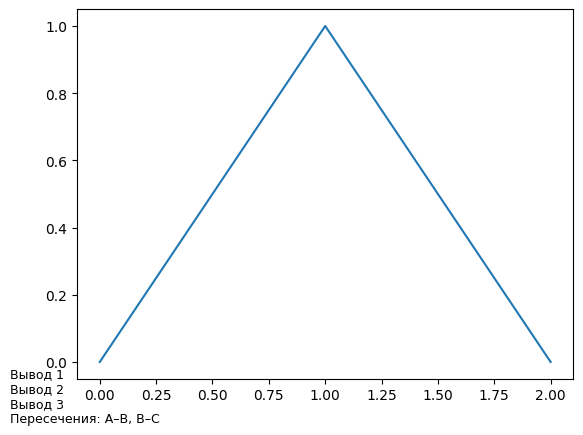

In [7]:
# 6) Пример: список выводим в левый нижний угол фигуры
import matplotlib.pyplot as plt

conclusions = ["Вывод 1", "Вывод 2", "Вывод 3"]
pairs_text = "A–B, B–C"

fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0, 1, 0])

fig.text(0.02, 0.02,
         "\n".join(conclusions) + "\n" + "Пересечения: " + pairs_text,
         fontsize=9)

plt.show()

### 7) `fig.add_artist(con)`
**Что делает:** Добавляет ранее созданный объект-художник (патч, аннотацию, и т.п.) на уровень фигуры для отрисовки.
Обычно `con` — это `ConnectionPatch` или другой объект из `matplotlib.patches`.

**Когда использовать:** Когда патч связывает **разные оси** — логично добавлять его на уровень фигуры (`fig.add_artist`), а не одной конкретной оси.

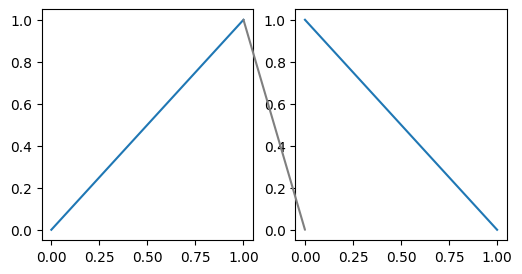

In [8]:
# 7) Пример: создаём ConnectionPatch и добавляем на фигуру
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
ax1.plot([0, 1], [0, 1])
ax2.plot([0, 1], [1, 0])

con = ConnectionPatch(
    xyA=(1, 1), coordsA=ax1.transData,
    xyB=(0, 0), coordsB=ax2.transData,
    linewidth=1.5, color="tab:gray"
)
fig.add_artist(con)

plt.show()

### 8) `ax_main.transData.transform(xy)`
**Что делает:** Преобразует координату из **системы данных** осей `ax_main` в **экранные координаты** (display coords, пиксели холста).
Полезно, если нужно узнать фактическое положение точки на экране/в фигуре.

**Аргументы:**
- `xy` — кортеж `(x, y)` в координатах данных оси `ax_main`.

**Возвращает:** `(X, Y)` в пикселях (display coordinates) относительно фигуры/канвы.

Координаты данных: (1, 1)
Экранные координаты (пиксели): [576.  422.4]


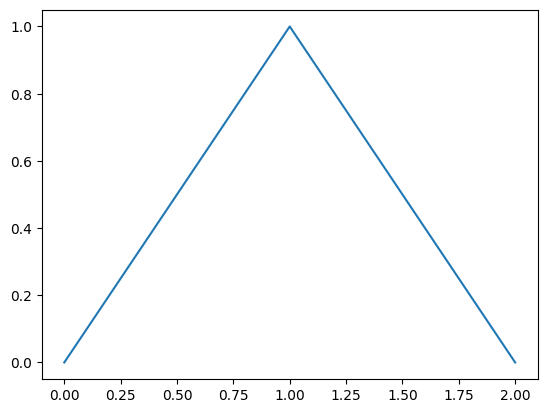

In [9]:
# 8) Пример: получаем экранные координаты точки графика
import matplotlib.pyplot as plt

fig, ax_main = plt.subplots()
ax_main.plot([0, 1, 2], [0, 1, 0])

xy_data = (1, 1)
xy_display = ax_main.transData.transform(xy_data)

print("Координаты данных:", xy_data)
print("Экранные координаты (пиксели):", xy_display)

plt.show()

### 9) `df["Longitude"] = df.apply(lambda row: dms_to_dd(row["Latitude deg"], row["Latitude min"], row["Latitude sec"]), axis=1)`
**Что делает:** Создаёт/заполняет столбец DataFrame, вычисляя для **каждой строки** десятичную координату из формата DMS (градусы-минуты-секунды).

**Параметры:**
- `apply(..., axis=1)` — применяет функцию **построчно** (на уровне `row`).
- `lambda row: ...` — анонимная функция, берёт значения из текущей строки.
- `dms_to_dd(deg, minutes, seconds)` — функция, конвертирующая DMS → Decimal Degrees.

> Примечание: в исходной строке записано `Longitude` из полей `Latitude ...` — вероятно, опечатка. В примере ниже пишем в столбец `"Latitude"`.

In [10]:
# 9) Пример: конвертация DMS → DD построчно
import pandas as pd

def dms_to_dd(deg, minutes, seconds, sign=1):
    return sign * (abs(deg) + minutes/60 + seconds/3600)

df = pd.DataFrame({
    "Latitude deg": [55, 59],
    "Latitude min": [45, 56],
    "Latitude sec": [30, 10],
})

df["Latitude"] = df.apply(
    lambda row: dms_to_dd(row["Latitude deg"], row["Latitude min"], row["Latitude sec"]),
    axis=1
)

print(df)

   Latitude deg  Latitude min  Latitude sec   Latitude
0            55            45            30  55.758333
1            59            56            10  59.936111


### 10) `axes.imshow(map_img, extent=[0, width, 0, height], origin="upper", zorder=0)`
**Что делает:** Показывает изображение `map_img` на осях с заданной рамкой координат `extent`.

**Параметры ключевые:**
- `extent=[xmin, xmax, ymin, ymax]` — куда «растянуть» изображение в координатах осей.
- `origin="upper"` — начало координат изображения в **верхнем левом углу** (как в растрах).
- `zorder` — порядок отрисовки (0 — на заднем плане).

**Замечание:** `width` и `height`— размеры в координатах ваших осей (не обязательно пиксели).

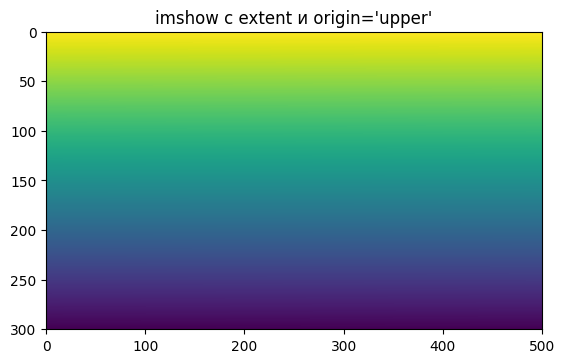

In [11]:
# 10) Пример: отображаем карту как подложку
import matplotlib.pyplot as plt
import numpy as np

# Синтетическая "карта": градиент
height, width = 300, 500
map_img = np.linspace(0, 1, height*width, dtype=float).reshape(height, width)

fig, axes = plt.subplots()
axes.imshow(map_img, extent=[0, width, 0, height], origin="upper", zorder=0, cmap="viridis")
axes.set_xlim(0, width)
axes.set_ylim(height, 0)  # если хотим «как в изображении» сверху вниз
axes.set_title("imshow с extent и origin='upper'")
plt.show()

### 11) `for x, y, capital, population, country in zip(df_mil_cit["x_pixel"], df_mil_cit["y_pixel"], df_mil_cit["Capital"], df_mil_cit["Population"], df_mil_cit["Country"]):`
**Что делает:** Итерируется синхронно по нескольким столбцам DataFrame, распаковывая значения в переменные.

**Ключевое:** `zip(a, b, c, ...)` берёт элементы поколоночно: `(a[i], b[i], c[i], ...)`.

**Когда удобно:** когда нужно отрисовать/обработать точки с атрибутами (подписи, страна, население и т.д.).

In [12]:
# 11) Пример: обходим строки таблицы через zip
import pandas as pd

df_mil_cit = pd.DataFrame({
    "x_pixel": [100, 200, 150],
    "y_pixel": [80, 120, 60],
    "Capital": ["A-City", "B-City", "C-City"],
    "Population": [1_000_000, 500_000, 250_000],
    "Country": ["A", "B", "C"],
})

for x, y, capital, population, country in zip(
    df_mil_cit["x_pixel"],
    df_mil_cit["y_pixel"],
    df_mil_cit["Capital"],
    df_mil_cit["Population"],
    df_mil_cit["Country"]
):
    print(f"{country}: {capital} @ ({x},{y}), население={population}")

A: A-City @ (100,80), население=1000000
B: B-City @ (200,120), население=500000
C: C-City @ (150,60), население=250000


### 12) `axes.scatter(x, y, color=colors[country], marker="*", zorder=5, s=100, alpha=A)`
**Что делает:** Рисует маркер звёздочкой в позиции `(x, y)` с цветом, зависящим от страны.

**Параметры:**
- `color=colors[country]` — берём цвет из словаря по ключу `country`.
- `marker="*"` — звездочка.
- `s=100` — размер маркера.
- `zorder=5` — поверх подложки.
- `alpha=A` — прозрачность (0..1).

**Где использовать:** внутри цикла из п.11 для множественных точек.

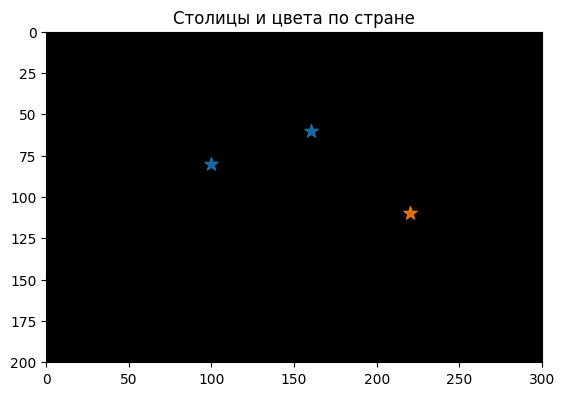

In [13]:
# 12) Пример: раскрашиваем столицы по странам и ставим звездочки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "x": [100, 220, 160],
    "y": [80, 110, 60],
    "Country": ["A", "B", "A"]
})

colors = {"A": "tab:blue", "B": "tab:orange"}
A = 0.85  # прозрачность

# Подложка
height, width = 200, 300
base = np.zeros((height, width))
fig, axes = plt.subplots()
axes.imshow(base, extent=[0, width, 0, height], origin="upper", zorder=0, cmap="gray")

for x, y, country in zip(df["x"], df["y"], df["Country"]):
    axes.scatter(x, y, color=colors[country], marker="*", zorder=5, s=100, alpha=A)

axes.set_xlim(0, width)
axes.set_ylim(height, 0)
axes.set_title("Столицы и цвета по стране")
plt.show()

### 13) `map_img_gray = Image.fromarray((map_img * 255).astype(np.uint8)).convert("L")`
**Что делает:** Берёт массив `map_img` (обычно `float` 0..1), конвертирует в 8-битное изображение и переводит в **градации серого** (`"L"`).

**Этапы:**
1. `(map_img * 255).astype(np.uint8)` — нормализация к 0..255 и преобразование к `uint8`.
2. `Image.fromarray(...)` — превращаем NumPy-массив в PIL-изображение.
3. `.convert("L")` — переводим в одноканальное изображение (grayscale).

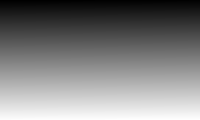

In [14]:
# 13) Пример: делаем градации серого из float-карты
import numpy as np
from PIL import Image

# синтетическое float-изображение 0..1
h, w = 120, 200
map_img = np.linspace(0, 1, h*w, dtype=float).reshape(h, w)

map_img_gray = Image.fromarray((map_img * 255).astype(np.uint8)).convert("L")
display(map_img_gray)  # в Jupyter покажет превью

### 14) `height, width = map_img_gray.shape[:2]`
**Что делает:** Получает высоту и ширину **NumPy-массива** изображения.

**Важно:** Если у вас **PIL.Image**, у него **нет** `.shape`; сначала преобразуйте к массиву:
```python
arr = np.array(map_img_gray)
height, width = arr.shape[:2]

In [16]:
# 14) Пример: корректно получаем размеры из PIL.Image
import numpy as np
from PIL import Image

img = Image.new("L", (320, 200), color=128)  # PIL Image: (width=320, height=200)
arr = np.array(img)                          # -> NumPy массив (H, W)
height, width = arr.shape[:2]
print("Высота, ширина:", height, width)

Высота, ширина: 200 320


### 15) `axes.imshow(map_img_gray, extent=[0, width, 0, height], origin="upper", zorder=0, cmap="gray")`
**Что делает:** Отображает **градации серого** как подложку на осях с нужным `extent`.

**Параметры ключевые:**
- `cmap="gray"` — палитра серого.
- Остальные параметры — как в п.10 (рамка координат, порядок, начало координат).

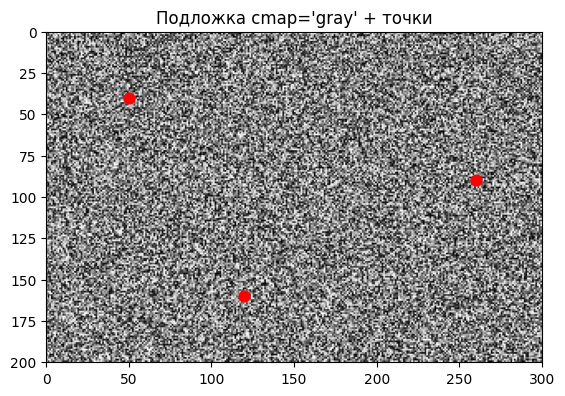

In [17]:
# 15) Пример: рисуем серую подложку и сверху точки
import matplotlib.pyplot as plt
import numpy as np

height, width = 200, 300
map_img_gray = (np.random.rand(height, width)*255).astype(np.uint8)  # уже NumPy "серое" изображение

fig, axes = plt.subplots()
axes.imshow(map_img_gray, extent=[0, width, 0, height], origin="upper", zorder=0, cmap="gray")

# поверх — несколько точек
xs = [50, 120, 260]
ys = [40, 160, 90]
axes.scatter(xs, ys, c="red", s=60, zorder=5)

axes.set_xlim(0, width)
axes.set_ylim(height, 0)
axes.set_title("Подложка cmap='gray' + точки")
plt.show()

In [ ]:
"""
Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

 

Example 1:

Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation: 
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.
"""

class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        nums.sort()
        x = 0
        result = []

        while x != len(nums) - 2:
            if x > 0 and nums[x] == nums[x - 1]:
                x += 1
                continue
                
            left = x + 1
            right = len(nums) - 1

            while left<right:
                total = nums[x] + nums[left] + nums[right]
                if total == 0:
                    result.append([nums[x], nums[left], nums[right]])

                    while left<right and nums[left] == nums[left + 1]:
                        left += 1
                    while left<right and nums[right] == nums[right - 1]:
                        right -= 1

                    left += 1
                    right -= 1

                elif total < 0:
                    left += 1
                elif total > 0:
                    right -= 1

            x += 1
            
        return result